**K-State Honor Code:** "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." - R. Laessig

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#Get data
df=pd.read_csv("movie_metadata.csv")
df = df.sort_index(axis=1)
df.head(2)

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,color,...,imdb_score,language,movie_facebook_likes,movie_imdb_link,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
0,1000.0,CCH Pounder,936.0,Joel David Moore,855.0,Wes Studi,1.78,237000000.0,4834,Color,...,7.9,English,33000,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Avatar,723.0,3054.0,886204,avatar|future|marine|native|paraplegic,2009.0
1,40000.0,Johnny Depp,5000.0,Orlando Bloom,1000.0,Jack Davenport,2.35,300000000.0,48350,Color,...,7.1,English,0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Pirates of the Caribbean: At World's End,302.0,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,2007.0


In [3]:
#How many missing values?
df = df.sort_index(axis=1)
df.isnull().sum()

actor_1_facebook_likes         7
actor_1_name                   7
actor_2_facebook_likes        13
actor_2_name                  13
actor_3_facebook_likes        23
actor_3_name                  23
aspect_ratio                 329
budget                       492
cast_total_facebook_likes      0
color                         19
content_rating               303
country                        5
director_facebook_likes      104
director_name                104
duration                      15
facenumber_in_poster          13
genres                         0
gross                        884
imdb_score                     0
language                      12
movie_facebook_likes           0
movie_imdb_link                0
movie_title                    0
num_critic_for_reviews        50
num_user_for_reviews          21
num_voted_users                0
plot_keywords                153
title_year                   108
dtype: int64

* Aspect_ratio, director_facebook_likes, director_name, plot_keywords, and title year have a lot of blank cells. I can't think of a reason for these columns to have a high number of missing values. They should be dropped.
* Budget, content_rating, gross, num_critic_for_reviews, and num_user_for_reviews have a lot of missing values, but the high number of missing values for these variables are easier to explain (i.e. 0 budget, no content rating, no critics reviewed, etc.). Those fields should be looked at.

In [4]:
# remove  columns
df = df.drop(['actor_3_name', 'actor_3_facebook_likes', 'color', 'director_name', 'director_facebook_likes', 'language', 'country', 'aspect_ratio', 'movie_imdb_link', 'title_year', 'plot_keywords'], axis=1)
df.head(2)

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,budget,cast_total_facebook_likes,content_rating,duration,facenumber_in_poster,genres,gross,imdb_score,movie_facebook_likes,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users
0,1000.0,CCH Pounder,936.0,Joel David Moore,237000000.0,4834,PG-13,178.0,0.0,Action|Adventure|Fantasy|Sci-Fi,760505847.0,7.9,33000,Avatar,723.0,3054.0,886204
1,40000.0,Johnny Depp,5000.0,Orlando Bloom,300000000.0,48350,PG-13,169.0,0.0,Action|Adventure|Fantasy,309404152.0,7.1,0,Pirates of the Caribbean: At World's End,302.0,1238.0,471220


In [5]:
# rename columns
df = df.rename(columns={'actor_1_facebook_likes':'act1_likes', 'actor_1_name':'act1', 'actor_2_facebook_likes':'act2_likes', 'actor_2_name':'act2',
                       'cast_total_facebook_likes':'cast_likes', 'content_rating':'rating', 'duration':'dur', 'facenumber_in_poster':'facenumber',
                       'movie_facebook_likes':'movie_likes', 'movie_title':'movie', 'num_critic_for_reviews':'critic_reviews', 'num_user_for_reviews':'user_reviews',
                       'num_voted_users':'voted_users'})
df.head(2)

,act1_likes,act1,act2_likes,act2,budget,cast_likes,rating,dur,facenumber,genres,gross,imdb_score,movie_likes,movie,critic_reviews,user_reviews,voted_users
0,1000.0,CCH Pounder,936.0,Joel David Moore,237000000.0,4834,PG-13,178.0,0.0,Action|Adventure|Fantasy|Sci-Fi,760505847.0,7.9,33000,Avatar,723.0,3054.0,886204
1,40000.0,Johnny Depp,5000.0,Orlando Bloom,300000000.0,48350,PG-13,169.0,0.0,Action|Adventure|Fantasy,309404152.0,7.1,0,Pirates of the Caribbean: At World's End,302.0,1238.0,471220


In [6]:
#How many missing values?
df = df.sort_index(axis=1)
df.isnull().sum()

act1                7
act1_likes          7
act2               13
act2_likes         13
budget            492
cast_likes          0
critic_reviews     50
dur                15
facenumber         13
genres              0
gross             884
imdb_score          0
movie               0
movie_likes         0
rating            303
user_reviews       21
voted_users         0
dtype: int64

In [7]:
#handling missing value: remove the rows with any missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3831 entries, 0 to 5042
Data columns (total 17 columns):
act1              3831 non-null object
act1_likes        3831 non-null float64
act2              3831 non-null object
act2_likes        3831 non-null float64
budget            3831 non-null float64
cast_likes        3831 non-null int64
critic_reviews    3831 non-null float64
dur               3831 non-null float64
facenumber        3831 non-null float64
genres            3831 non-null object
gross             3831 non-null float64
imdb_score        3831 non-null float64
movie             3831 non-null object
movie_likes       3831 non-null int64
rating            3831 non-null object
user_reviews      3831 non-null float64
voted_users       3831 non-null int64
dtypes: float64(9), int64(3), object(5)
memory usage: 538.7+ KB


# Exploratory Data Analysis

In [8]:
#Change the dtypes
df['budget'] = df['budget'].astype(float)
df['critic_reviews'] = df['critic_reviews'].astype(float)
df['gross'] = df['gross'].astype(float)
df['user_reviews'] = df['user_reviews'].astype(float)
df['act1_likes'] = df['act1_likes'].astype(float)
df['act2_likes'] = df['act2_likes'].astype(float)
df['facenumber'] = df['facenumber'].astype(float)
df['dur'] = df['dur'].astype(float)
df['cast_likes'] = df['cast_likes'].astype(float)
df['voted_users'] = df['voted_users'].astype(float)
df['movie_likes'] = df['movie_likes'].astype(float)
df['imdb_score'] = df['imdb_score'].astype(int)
df['rating'] = df['rating'].astype('category')

In [9]:
df.dtypes

act1                object
act1_likes         float64
act2                object
act2_likes         float64
budget             float64
cast_likes         float64
critic_reviews     float64
dur                float64
facenumber         float64
genres              object
gross              float64
imdb_score           int32
movie               object
movie_likes        float64
rating            category
user_reviews       float64
voted_users        float64
dtype: object

In [75]:
df.corr()

,act1_likes,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,gross,imdb_score,movie_likes,user_reviews,voted_users,score
act1_likes,1.000000,0.391028,0.017325,0.945035,0.169901,0.086567,0.061710,0.146782,0.091161,0.131706,0.124962,0.181803,0.091161
act2_likes,0.391028,1.000000,0.036686,0.642476,0.256958,0.131386,0.072407,0.255341,0.100600,0.234142,0.190172,0.247438,0.100600
budget,0.017325,0.036686,1.000000,0.029787,0.107080,0.069457,-0.021522,0.101292,0.034997,0.053621,0.072426,0.067827,0.034997
cast_likes,0.945035,0.642476,0.029787,1.000000,0.240960,0.123517,0.084158,0.238573,0.105099,0.207172,0.182219,0.251763,0.105099
critic_reviews,0.169901,0.256958,0.107080,0.240960,1.000000,0.236789,-0.033784,0.470810,0.341624,0.703328,0.569242,0.596810,0.341624
dur,0.086567,0.131386,0.069457,0.123517,0.236789,1.000000,0.026775,0.251207,0.353773,0.218098,0.355903,0.343683,0.353773
facenumber,0.061710,0.072407,-0.021522,0.084158,-0.033784,0.026775,1.000000,-0.030236,-0.073439,0.016850,-0.080162,-0.031947,-0.073439
gross,0.146782,0.255341,0.101292,0.238573,0.470810,0.251207,-0.030236,1.000000,0.207235,0.369617,0.548884,0.628130,0.207235
imdb_score,0.091161,0.100600,0.034997,0.105099,0.341624,0.353773,-0.073439,0.207235,1.000000,0.275974,0.312431,0.465229,1.000000
movie_likes,0.131706,0.234142,0.053621,0.207172,0.703328,0.218098,0.016850,0.369617,0.275974,1.000000,0.372961,0.519258,0.275974


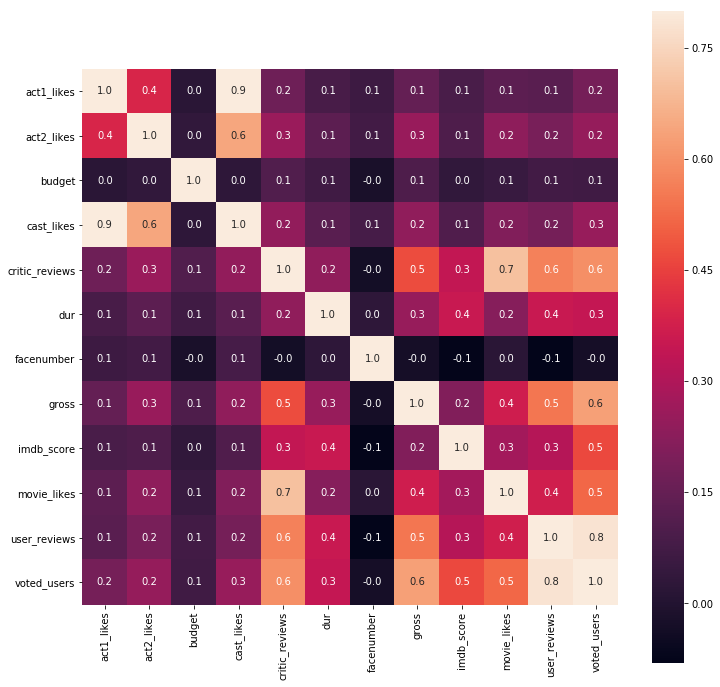

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

It looks like the variables most correlated to imdb_score are
* critic reviews (.3)
* duration (.26)
* user reviews (.29)
* voted users (.41)

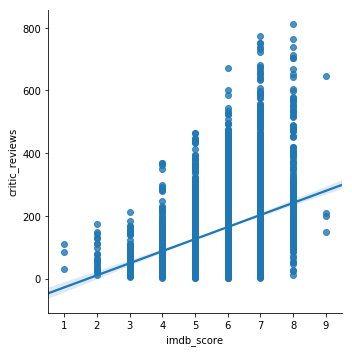

In [13]:
sns.lmplot('imdb_score','critic_reviews', df)

The higher the number of critical reviews a movie recieves, the more likely it will have a higher IMDB rating.

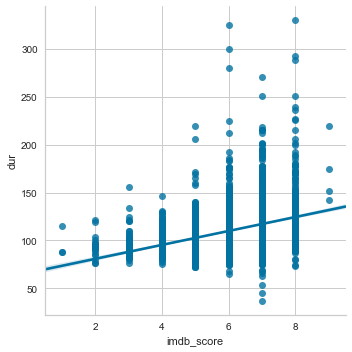

In [80]:
sns.lmplot('imdb_score','dur', df)

The longer the movie, the more likely it will have a higher IMDB rating.

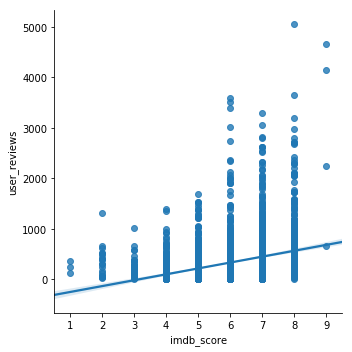

In [15]:
sns.lmplot('imdb_score', 'user_reviews', df)

The more the number of users who reviewed the movie, the more likely it will have a higher IMDB rating.

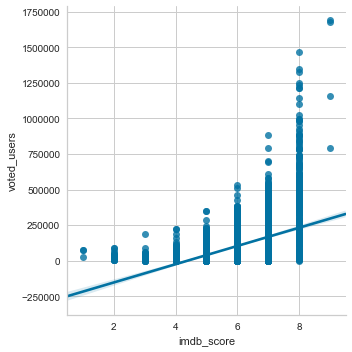

In [81]:
sns.lmplot('imdb_score','voted_users', df)

The higher the number of users who voted for the movie, the more likely it will have a higher IMDB rating.

# Regression

## Regression Model Development

In [17]:
# Define X & y
X = df[['act1_likes', 'act2_likes', 'budget', 'cast_likes', 'critic_reviews', 'dur', 'facenumber', 'gross', 'movie_likes', 'user_reviews', 'voted_users']]
y = df["imdb_score"]
#X = df.drop(['imdb_score'], axis =1)

# X contains (too) many independent variables or predictors ... we will see how it goes

In [18]:
y.head(2)

0    7
1    7
Name: imdb_score, dtype: int32

In [19]:
X.head(2)

,act1_likes,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,gross,movie_likes,user_reviews,voted_users
0,1000.0,936.0,237000000.0,4834.0,723.0,178.0,0.0,760505847.0,33000.0,3054.0,886204.0
1,40000.0,5000.0,300000000.0,48350.0,302.0,169.0,0.0,309404152.0,0.0,1238.0,471220.0


In [20]:
# build a multiple regression model below

model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [21]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 3.18726662e-05  3.55997633e-05 -3.23049155e-11 -3.13029971e-05
  1.61997681e-03  1.21319699e-02 -3.74824815e-02 -2.11661753e-09
 -2.62083518e-06 -6.09539997e-04  4.18017035e-06]
y-intercept  4.4014881946302795


In [90]:
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,act1_likes,3.187267e-05
1,act2_likes,3.559976e-05
2,budget,-3.230492e-11
3,cast_likes,-3.130300e-05
4,critic_reviews,1.619977e-03
5,dur,1.213197e-02
6,facenumber,-3.748248e-02
7,gross,-2.116618e-09
8,movie_likes,-2.620835e-06
9,user_reviews,-6.095400e-04


In [23]:
coef = ["%.8f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('act1_likes', '0.00003187'),
 ('act2_likes', '0.00003560'),
 ('budget', '-0.00000000'),
 ('cast_likes', '-0.00003130'),
 ('critic_reviews', '0.00161998'),
 ('dur', '0.01213197'),
 ('facenumber', '-0.03748248'),
 ('gross', '-0.00000000'),
 ('movie_likes', '-0.00000262'),
 ('user_reviews', '-0.00060954'),
 ('voted_users', '0.00000418')]

In [24]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.8304445505836622
variance or r-squared:  0.30925435696253767


In [25]:
# Define X & y
X = df[['critic_reviews', 'dur', 'user_reviews', 'voted_users']]
y = df['imdb_score']
#X = df.drop(['imdb_score'], axis =1)

# X contains (too) many independent variables or predictors ... we will see how it goes

In [26]:
# build a multiple regression model below

model2 = lm.LinearRegression()
model2.fit(X, y)   
model2_y = model2.predict(X)

In [91]:
print 'Coefficients: ', model2.coef_
print "y-intercept ", model2.intercept_

Coefficients:  [ 1.08465135e-03  1.15082403e-02 -5.78151039e-04  3.47663507e-06]
y-intercept  4.393009633611907


For every decrease in critic reviews, duration, user reviews, and voted users there is a decrease in IMDB score.


In [27]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('critic_reviews', '0.001'),
 ('dur', '0.012'),
 ('user_reviews', '-0.001'),
 ('voted_users', '0.000')]

In [28]:
pd.DataFrame(zip(X.columns, np.transpose(model2.coef_)))

,0,1
0,critic_reviews,0.001085
1,dur,0.011508
2,user_reviews,-0.000578
3,voted_users,0.000003


In [29]:
print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  0.8642196904736066
variance or r-squared:  0.28116093313843893


# Model Evaluation

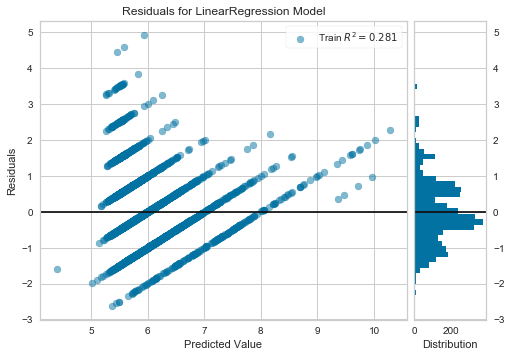

In [30]:
from yellowbrick.regressor import ResidualsPlot

X = df[['critic_reviews', 'dur', 'user_reviews', 'voted_users']]
y = df['imdb_score']

# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

## Regression using Statsmodels

In [96]:
runs_reg_model1 = ols("imdb_score~critic_reviews+user_reviews+voted_users+dur",df)
runs_reg1 = runs_reg_model1.fit()
runs_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     374.1
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          2.94e-272
Time:                        22:05:21   Log-Likelihood:                -5156.4
No. Observations:                3831   AIC:                         1.032e+04
Df Residuals:                    3826   BIC:                         1.035e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3930      0.078     56.245      0.000       4.240       4.546
critic_reviews     0.0011      0.000      7.005      0.000       0.001       0.001
user_reviews      -0.0006   6.07e-05     -9.524      0.000      -0.001      -0.000
voted_users     3.477e-06   1.68e-07     20.749      0.000    3.15e-06    3.81e-06
dur                0.0115      0.001     16.046      0.000       0.010       0.013
==============================================================================
Omnibus:                      349.308   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.969
Skew:                          -0.686   Prob(JB):                    3.39e-118
Kurtosis:                       4.227   Cond. No.                     9.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
runs_reg_model2 = ols("imdb_score~dur",df)
runs_reg2 = runs_reg_model2.fit()
runs_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     547.8
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          2.44e-113
Time:                        21:21:02   Log-Likelihood:                -5532.6
No. Observations:                3831   AIC:                         1.107e+04
Df Residuals:                    3829   BIC:                         1.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1168      0.082     49.925      0.000       3.955       4.278
dur            0.0172      0.001     23.405      0.000       0.016       0.019
==============================================================================
Omnibus:                      301.272   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              439.084
Skew:                          -0.634   Prob(JB):                     4.51e-96
Kurtosis:                       4.068   Cond. No.                         559.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
runs_reg_model3 = ols("imdb_score~user_reviews",df)
runs_reg3 = runs_reg_model3.fit()
runs_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     414.2
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.64e-87
Time:                        21:21:02   Log-Likelihood:                -5592.0
No. Observations:                3831   AIC:                         1.119e+04
Df Residuals:                    3829   BIC:                         1.120e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.7302      0.022    264.671      0.000       5.688       5.773
user_reviews     0.0008   4.11e-05     20.352      0.000       0.001       0.001
==============================================================================
Omnibus:                      439.437   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              685.313
Skew:                          -0.822   Prob(JB):                    1.54e-149
Kurtosis:                       4.260   Cond. No.                         677.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
runs_reg_model4 = ols("imdb_score~voted_users",df)
runs_reg4 = runs_reg_model4.fit()
runs_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     1058.
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          4.42e-205
Time:                        21:21:02   Log-Likelihood:                -5321.6
No. Observations:                3831   AIC:                         1.065e+04
Df Residuals:                    3829   BIC:                         1.066e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.6569      0.019    297.264      0.000       5.620       5.694
voted_users  3.374e-06   1.04e-07     32.522      0.000    3.17e-06    3.58e-06
==============================================================================
Omnibus:                      440.822   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.963
Skew:                          -0.802   Prob(JB):                    1.69e-157
Kurtosis:                       4.395   Cond. No.                     2.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The first model (critic reviews) has a R-squared of 0.281.
- The second model (duration) has a R-squared of 0.067.
- The third model (user reviews) has a R-squared of 0.078.
- The fourth model (voted_users) has a R-squared of 0.160.
- Based on this analysis, can confirm that **first model** has the better correlation compared to the other three.

## Regression Plots (Statsmodels)

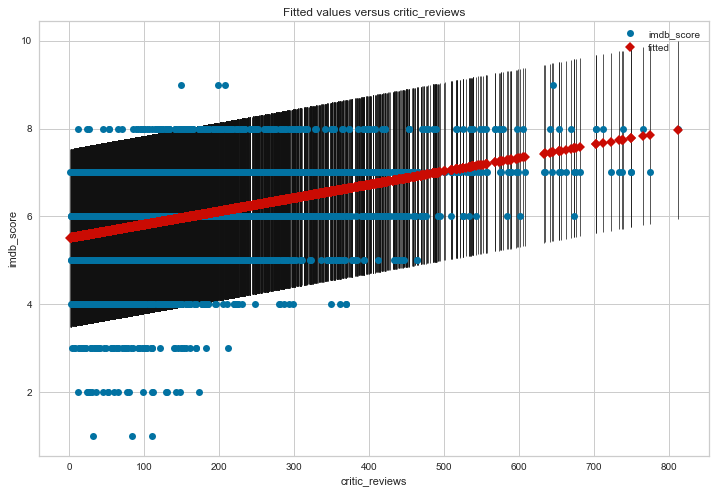

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(runs_reg1, "critic_reviews", ax=ax)

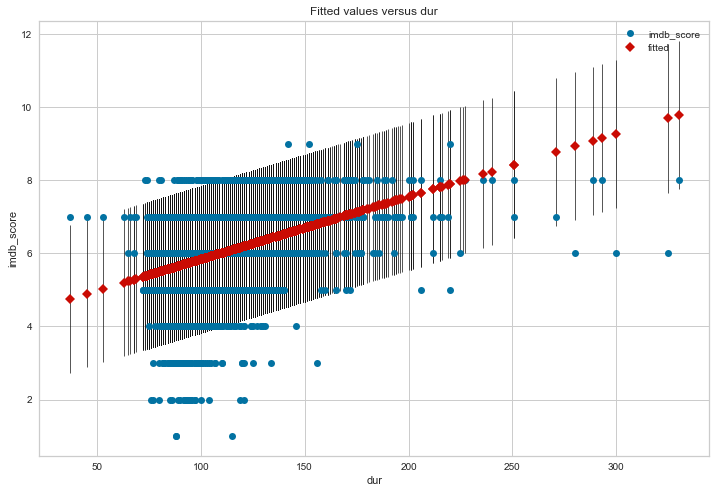

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(runs_reg2, "dur", ax=ax)

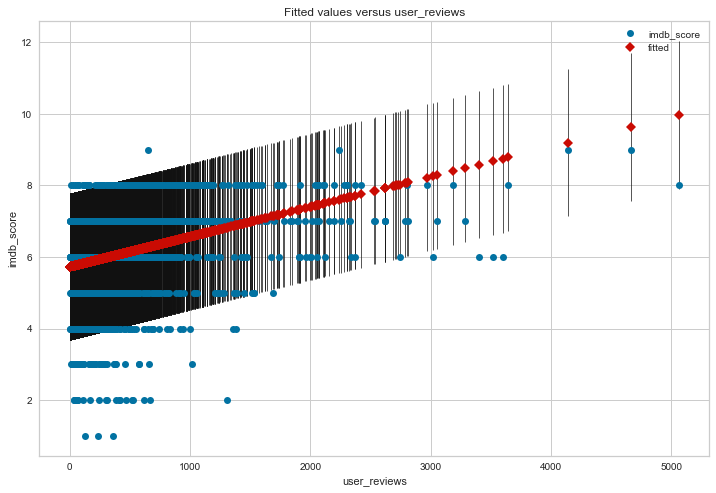

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(runs_reg3, "user_reviews", ax=ax)

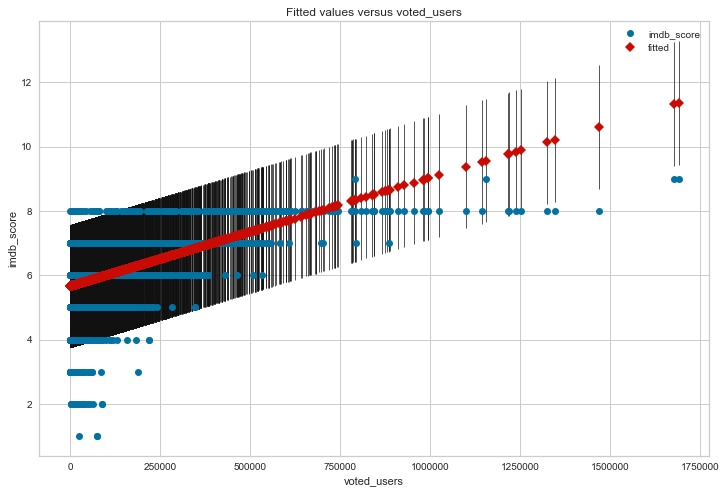

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(runs_reg4, "voted_users", ax=ax)

# Classification

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Classification: Data Transformation

In [40]:
df2=df
# Copy the imdb_score column
df2['score']=df2['imdb_score']
df2.head(2)

,act1,act1_likes,act2,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,genres,gross,imdb_score,movie,movie_likes,rating,user_reviews,voted_users,score
0,CCH Pounder,1000.0,Joel David Moore,936.0,237000000.0,4834.0,723.0,178.0,0.0,Action|Adventure|Fantasy|Sci-Fi,760505847.0,7,Avatar,33000.0,PG-13,3054.0,886204.0,7
1,Johnny Depp,40000.0,Orlando Bloom,5000.0,300000000.0,48350.0,302.0,169.0,0.0,Action|Adventure|Fantasy,309404152.0,7,Pirates of the Caribbean: At World's End,0.0,PG-13,1238.0,471220.0,7


In [41]:
#replacing imdb scores
df2 = df2.replace({'imdb_score': 1}, {'imdb_score': 'BAD'})
df2 = df2.replace({'imdb_score': 2}, {'imdb_score': 'BAD'})
df2 = df2.replace({'imdb_score': 3}, {'imdb_score': 'BAD'})
df2 = df2.replace({'imdb_score': 4}, {'imdb_score': 'OK'})
df2 = df2.replace({'imdb_score': 5}, {'imdb_score': 'OK'})
df2 = df2.replace({'imdb_score': 6}, {'imdb_score': 'GOOD'})
df2 = df2.replace({'imdb_score': 7}, {'imdb_score': 'GOOD'})
df2 = df2.replace({'imdb_score': 8}, {'imdb_score': 'EXCELLENT'})
df2 = df2.replace({'imdb_score': 9}, {'imdb_score': 'EXCELLENT'})
df2 = df2.replace({'imdb_score': 10}, {'imdb_score': 'EXCELLENT'})
df2.head(2)

,act1,act1_likes,act2,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,genres,gross,imdb_score,movie,movie_likes,rating,user_reviews,voted_users,score
0,CCH Pounder,1000.0,Joel David Moore,936.0,237000000.0,4834.0,723.0,178.0,0.0,Action|Adventure|Fantasy|Sci-Fi,760505847.0,GOOD,Avatar,33000.0,PG-13,3054.0,886204.0,7
1,Johnny Depp,40000.0,Orlando Bloom,5000.0,300000000.0,48350.0,302.0,169.0,0.0,Action|Adventure|Fantasy,309404152.0,GOOD,Pirates of the Caribbean: At World's End,0.0,PG-13,1238.0,471220.0,7


In [42]:
#How many movies are in the 'BAD', 'OK', 'GOOD', and 'EXCELLENT' categories?
count = df2.groupby('imdb_score').size()
count

imdb_score
BAD            89
EXCELLENT     215
GOOD         2544
OK            983
dtype: int64

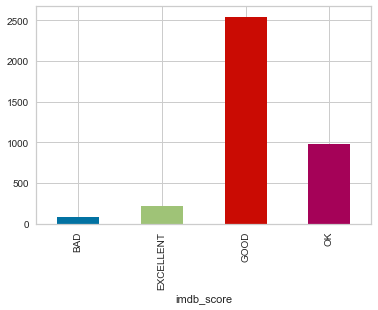

In [43]:
count.plot(kind='bar')

* It looks like the majority of movies on IMDB are rated between 6 -8 ('GOOD').
* There is a larger number of 'OK' and 'GOOD' movies than there are 'EXCELLENT' or 'BAD' movies.
* The least amount of movies were rated as 'BAD' (1-3).

## Classification: Correlation Analysis

In [44]:
# create dummy variables or colummn for imdb_score
imdb_dummies = pd.get_dummies(df2['imdb_score'], prefix='imdb')
df2 = df2.join(imdb_dummies)
df2.head(2)

,act1,act1_likes,act2,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,genres,...,movie,movie_likes,rating,user_reviews,voted_users,score,imdb_BAD,imdb_EXCELLENT,imdb_GOOD,imdb_OK
0,CCH Pounder,1000.0,Joel David Moore,936.0,237000000.0,4834.0,723.0,178.0,0.0,Action|Adventure|Fantasy|Sci-Fi,...,Avatar,33000.0,PG-13,3054.0,886204.0,7,0,0,1,0
1,Johnny Depp,40000.0,Orlando Bloom,5000.0,300000000.0,48350.0,302.0,169.0,0.0,Action|Adventure|Fantasy,...,Pirates of the Caribbean: At World's End,0.0,PG-13,1238.0,471220.0,7,0,0,1,0


In [45]:
# What variables are most correlated with imdb_BAD
corr = pd.DataFrame(df2.corr()['imdb_BAD'].drop(['imdb_GOOD', 'imdb_OK', 'imdb_EXCELLENT','imdb_BAD','score']))
corr.sort_values(['imdb_BAD'], ascending = False)

,imdb_BAD
facenumber,0.017327
budget,-0.012748
user_reviews,-0.039696
act2_likes,-0.045515
movie_likes,-0.051136
act1_likes,-0.051430
cast_likes,-0.056401
gross,-0.070294
voted_users,-0.080194
dur,-0.096323


In [46]:
# What variables are most correlated with imdb_OK
corr = pd.DataFrame(df2.corr()['imdb_OK'].drop(['imdb_GOOD', 'imdb_OK', 'imdb_EXCELLENT','imdb_BAD','score']))
corr.sort_values(['imdb_OK'], ascending = False)

,imdb_OK
facenumber,0.051825
budget,-0.022646
act1_likes,-0.054618
cast_likes,-0.061847
act2_likes,-0.064329
gross,-0.120721
movie_likes,-0.147893
user_reviews,-0.170452
critic_reviews,-0.211504
voted_users,-0.245142


In [47]:
# What variables are most correlated with imdb_GOOD
corr = pd.DataFrame(df2.corr()['imdb_GOOD'].drop(['imdb_GOOD', 'imdb_OK', 'imdb_EXCELLENT','imdb_BAD','score']))
corr.sort_values(['imdb_GOOD'], ascending = False)

,imdb_GOOD
dur,0.128836
critic_reviews,0.125142
act1_likes,0.051013
cast_likes,0.049768
act2_likes,0.047307
gross,0.040588
budget,0.018012
movie_likes,0.007162
user_reviews,-0.008603
voted_users,-0.030142


In [48]:
# What variables are most correlated with imdb_EXCELLENT
corr = pd.DataFrame(df2.corr()['imdb_EXCELLENT'].drop(['imdb_GOOD', 'imdb_OK', 'imdb_EXCELLENT','imdb_BAD','score']))
corr.sort_values(['imdb_EXCELLENT'], ascending = False)

,imdb_EXCELLENT
voted_users,0.579534
user_reviews,0.367094
movie_likes,0.299418
dur,0.265994
critic_reviews,0.216984
gross,0.191798
act2_likes,0.054781
cast_likes,0.052145
act1_likes,0.032619
budget,0.014354


In [49]:
# What are the variable averages for each of the IMDB score categories
df2.groupby('imdb_score').mean()

,act1_likes,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,gross,movie_likes,user_reviews,voted_users,score,imdb_BAD,imdb_EXCELLENT,imdb_GOOD,imdb_OK
imdb_score,,,,,,,,,,,,,,,,
BAD,2513.112360,662.000000,2.698202e+07,4437.337079,76.112360,95.898876,1.606742,1.979152e+07,2146.089888,225.707865,25242.786517,2.685393,1,0,0,0
EXCELLENT,9726.730233,3006.195349,5.866073e+07,15455.572093,274.855814,134.613953,0.981395,1.067011e+08,35341.223256,947.153488,463143.669767,8.018605,0,1,0,0
GOOD,8221.682783,2144.757862,4.835226e+07,12063.010220,175.843160,112.062893,1.333333,5.369628e+07,9312.364387,328.541667,100610.874214,6.428066,0,0,1,0
OK,6226.270600,1499.191251,3.685649e+07,9388.701933,120.329603,100.534079,1.557477,3.730228e+07,3845.633774,212.310275,40772.887080,4.779247,0,0,0,1


* ### Critic reviews
    * Least - BAD
    * Most - EXCELLENT

* ### Duration
    * Least - BAD
    * Most - EXCELLENTT
    
* ### User reviews
    * Least - BAD
    * Most - EXCELLENT

* ### Voted users
    * Least - BAD
    * Most - EXCELLENT

    
**EXCELLENT** movies tend to have more critic reviews, longer durations, more user reviews, and more users who voted. They also tend to have a well liked leading actor, have lower budgets than GOOD or OK movies, have the lowest faces in their posters, have the highest gross, and have the most FB likes for their movie.

# Clustering

In [50]:
#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.spatial.distance import cdist 
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn import tree

## Clustering: Data Prep

In [51]:
df2.dtypes

act1                object
act1_likes         float64
act2                object
act2_likes         float64
budget             float64
cast_likes         float64
critic_reviews     float64
dur                float64
facenumber         float64
genres              object
gross              float64
imdb_score          object
movie               object
movie_likes        float64
rating            category
user_reviews       float64
voted_users        float64
score                int32
imdb_BAD             uint8
imdb_EXCELLENT       uint8
imdb_GOOD            uint8
imdb_OK              uint8
dtype: object

In [52]:
# Change dtype to float64
df2['cast_likes'] = df2['cast_likes'].astype(float)
df2['movie_likes'] = df2['movie_likes'].astype(float)
df2['voted_users'] = df2['voted_users'].astype(float)
df2['score'] = df2['score'].astype(float)
df2.head(2)

,act1,act1_likes,act2,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,genres,...,movie,movie_likes,rating,user_reviews,voted_users,score,imdb_BAD,imdb_EXCELLENT,imdb_GOOD,imdb_OK
0,CCH Pounder,1000.0,Joel David Moore,936.0,237000000.0,4834.0,723.0,178.0,0.0,Action|Adventure|Fantasy|Sci-Fi,...,Avatar,33000.0,PG-13,3054.0,886204.0,7.0,0,0,1,0
1,Johnny Depp,40000.0,Orlando Bloom,5000.0,300000000.0,48350.0,302.0,169.0,0.0,Action|Adventure|Fantasy,...,Pirates of the Caribbean: At World's End,0.0,PG-13,1238.0,471220.0,7.0,0,0,1,0


In [53]:
# remove  columns
df3 = df2.drop(['act1','act2','genres','movie','rating','imdb_score','imdb_BAD', 'imdb_EXCELLENT', 'imdb_GOOD', 'imdb_OK' ], axis=1)
df3.head()

,act1_likes,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,gross,movie_likes,user_reviews,voted_users,score
0,1000.0,936.0,237000000.0,4834.0,723.0,178.0,0.0,760505847.0,33000.0,3054.0,886204.0,7.0
1,40000.0,5000.0,300000000.0,48350.0,302.0,169.0,0.0,309404152.0,0.0,1238.0,471220.0,7.0
2,11000.0,393.0,245000000.0,11700.0,602.0,148.0,1.0,200074175.0,85000.0,994.0,275868.0,6.0
3,27000.0,23000.0,250000000.0,106759.0,813.0,164.0,0.0,448130642.0,164000.0,2701.0,1144337.0,8.0
5,640.0,632.0,263700000.0,1873.0,462.0,132.0,1.0,73058679.0,24000.0,738.0,212204.0,6.0


df['budget'] = df['budget'].astype(float)
df['critic_reviews'] = df['critic_reviews'].astype(float)
df['gross'] = df['gross'].astype(float)
df['user_reviews'] = df['user_reviews'].astype(float)
df['act1_likes'] = df['act1_likes'].astype(float)
df['act2_likes'] = df['act2_likes'].astype(float)
df['facenumber'] = df['facenumber'].astype(float)
df['dur'] = df['dur'].astype(float)
df['imdb_score'] = df['imdb_score'].astype(int)

In [54]:
df3.var()

act1_likes        2.384003e+08
act2_likes        2.034453e+07
budget            5.011673e+16
cast_likes        3.615221e+08
critic_reviews    1.528928e+04
dur               5.094788e+02
facenumber        4.166113e+00
gross             4.894896e+15
movie_likes       4.531979e+08
user_reviews      1.675263e+05
voted_users       2.285919e+10
score             1.202558e+00
dtype: float64

In [55]:
#Normalization
df3_norm = (df3 - df3.mean()) / (df3.max() - df3.min())
df3_norm.head()

,act1_likes,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,gross,movie_likes,user_reviews,voted_users,score
0,-0.010409,-0.007715,0.015678,-0.009983,0.687391,0.232100,-0.032034,0.932050,0.068184,0.538240,0.463001,0.124086
1,0.050529,0.021949,0.020835,0.056279,0.168918,0.201383,-0.032034,0.338890,-0.026372,0.179275,0.217411,0.124086
2,0.005216,-0.011679,0.016333,0.000472,0.538376,0.129711,-0.008778,0.195130,0.217181,0.131044,0.101800,-0.000914
3,0.030216,0.153336,0.016742,0.145218,0.798228,0.184318,-0.032034,0.521303,0.443542,0.468463,0.615766,0.249086
5,-0.010971,-0.009934,0.017864,-0.014492,0.365962,0.075103,-0.008778,0.028115,0.042396,0.080442,0.064124,-0.000914


In [56]:
df3_norm.var()

act1_likes        0.000582
act2_likes        0.001084
budget            0.000336
cast_likes        0.000838
critic_reviews    0.023189
dur               0.005935
facenumber        0.002253
gross             0.008463
movie_likes       0.003721
user_reviews      0.006546
voted_users       0.008006
score             0.018790
dtype: float64

Text(0.5,1,'Selecting k with the Elbow Method')

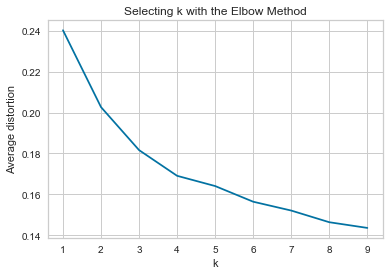

In [57]:
#The Elbow method

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

#http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df3_norm) 
    meandistortions.append(sum(np.min(cdist(df3_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df3_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

In [58]:
# clustering analysis using k-means

k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)
k_means.fit(df3_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [59]:
k_means.labels_

array([1, 1, 2, ..., 0, 0, 0])

In [60]:
k_means.cluster_centers_

array([[-0.00338706, -0.0050892 , -0.00142525, -0.00522482, -0.09584655,
        -0.00072692, -0.00062343, -0.03388611, -0.0225599 , -0.03542548,
        -0.03962639,  0.04225796],
       [ 0.00788294,  0.02465039,  0.00549807,  0.0176594 ,  0.27077833,
         0.10614184, -0.01184936,  0.25253271,  0.09624217,  0.25200334,
         0.29851355,  0.18304866],
       [ 0.0075372 ,  0.01657969,  0.00480943,  0.01272126,  0.29956058,
         0.02281086,  0.00502605,  0.05218765,  0.10507259,  0.04384941,
         0.07003779,  0.06268289],
       [ 0.0040005 ,  0.00320003,  0.00044913,  0.00461671,  0.06026004,
         0.01278052, -0.00404012,  0.01367736, -0.00116135,  0.02227643,
         0.02304928,  0.06740178],
       [-0.00348389, -0.00621771, -0.00110553, -0.00502897, -0.08127439,
        -0.03751091,  0.00522311, -0.02748043, -0.02047906, -0.03135592,
        -0.04314941, -0.17910238]])

In [61]:
# convert cluster lables to dataframe

df4 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df4.head()

,cluster
0,1
1,1
2,2
3,1
4,2


In [62]:
df3 = df3.reset_index(drop=True)
df4 = df4.reset_index(drop=True)

df5 = df3.join(df4)
df5.head()

,act1_likes,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,gross,movie_likes,user_reviews,voted_users,score,cluster
0,1000.0,936.0,237000000.0,4834.0,723.0,178.0,0.0,760505847.0,33000.0,3054.0,886204.0,7.0,1
1,40000.0,5000.0,300000000.0,48350.0,302.0,169.0,0.0,309404152.0,0.0,1238.0,471220.0,7.0,1
2,11000.0,393.0,245000000.0,11700.0,602.0,148.0,1.0,200074175.0,85000.0,994.0,275868.0,6.0,2
3,27000.0,23000.0,250000000.0,106759.0,813.0,164.0,0.0,448130642.0,164000.0,2701.0,1144337.0,8.0,1
4,640.0,632.0,263700000.0,1873.0,462.0,132.0,1.0,73058679.0,24000.0,738.0,212204.0,6.0,2


In [63]:
df5.tail()

,act1_likes,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,gross,movie_likes,user_reviews,voted_users,score,cluster
3826,291.0,45.0,7000.0,368.0,143.0,77.0,0.0,424760.0,19000.0,371.0,72639.0,7.0,0
3827,0.0,0.0,7000.0,0.0,35.0,80.0,0.0,70071.0,74.0,35.0,589.0,6.0,0
3828,121.0,20.0,7000.0,147.0,56.0,81.0,0.0,2040920.0,0.0,130.0,52055.0,6.0,0
3829,296.0,205.0,9000.0,690.0,14.0,95.0,1.0,4584.0,413.0,14.0,1338.0,6.0,0
3830,86.0,23.0,1100.0,163.0,43.0,90.0,0.0,85222.0,456.0,84.0,4285.0,6.0,0


In [64]:
# Change score to int to make grouping easier
df5['score'] = df5['score'].astype(int)

In [65]:
df5.groupby('cluster').mean()

,act1_likes,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,gross,movie_likes,user_reviews,voted_users,score
cluster,,,,,,,,,,,,
0,5493.805869,1295.789315,2.807441e+07,7958.747931,87.011287,109.781791,1.350640,2.590618e+07,1330.528969,151.828442,36893.443943,6.345372
1,12706.603774,5370.113208,1.126463e+08,22987.503145,384.710692,141.094340,0.867925,2.437293e+08,42792.452830,1605.930818,608262.698113,7.471698
2,12485.333333,4264.426901,1.042343e+08,19744.479532,408.081871,116.678363,1.593567,9.136576e+07,45874.269006,552.880117,222197.605263,6.508772
3,10221.841332,2431.413320,5.097096e+07,14421.977473,213.769833,113.739471,1.203722,6.207847e+07,8798.625857,443.742409,142799.153771,6.546523
4,5431.833673,1141.183673,3.198003e+07,8087.370408,98.843878,99.004082,1.602041,3.077773e+07,2056.742857,172.416327,30940.444898,4.574490


In [66]:
df5.groupby(['cluster']).size()
#which cluster is the largest

cluster
0    1329
1     159
2     342
3    1021
4     980
dtype: int64

## Classification: Data Visualization

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

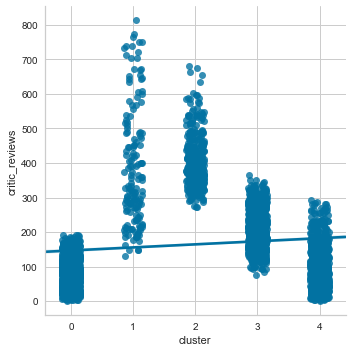

In [68]:
sns.lmplot("cluster", "critic_reviews", df5, x_jitter=.15, y_jitter=.15)

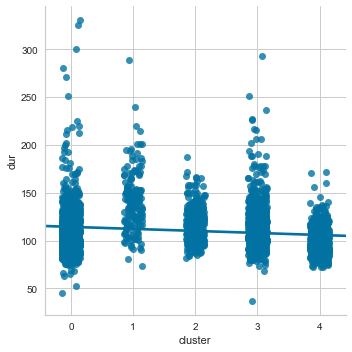

In [69]:
sns.lmplot("cluster", "dur", df5, x_jitter=.15, y_jitter=.15)

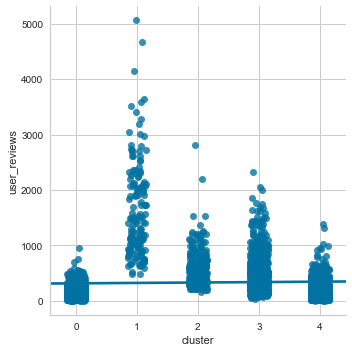

In [70]:
sns.lmplot("cluster", "user_reviews", df5, x_jitter=.15, y_jitter=.15)

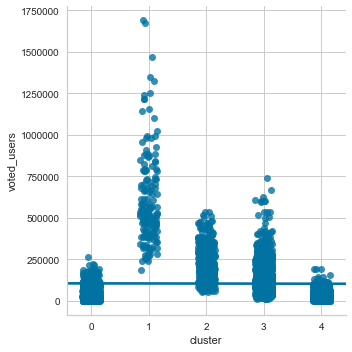

In [71]:
sns.lmplot("cluster", "voted_users", df5, x_jitter=.15, y_jitter=.15)

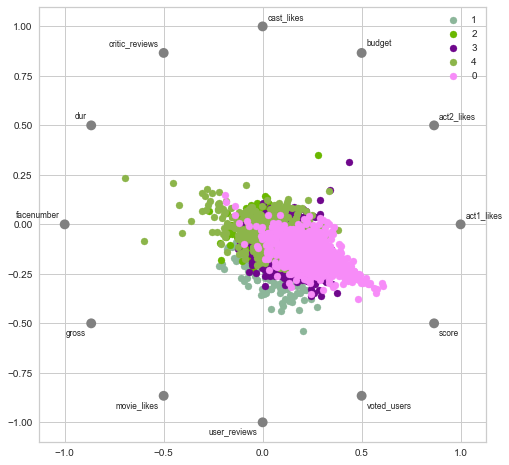

In [72]:
from pandas.plotting import radviz

plt.figure(figsize=(8,8))
radviz(df5, "cluster")

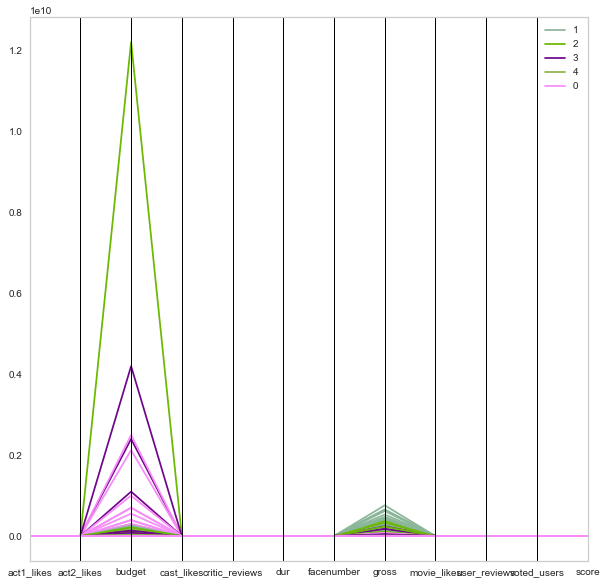

In [73]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,10))
parallel_coordinates(df5, 'cluster')

In [74]:
y = df5['cluster'].values
X = df5.drop(['cluster'], axis=1)
X.head()

,act1_likes,act2_likes,budget,cast_likes,critic_reviews,dur,facenumber,gross,movie_likes,user_reviews,voted_users,score
0,1000.0,936.0,237000000.0,4834.0,723.0,178.0,0.0,760505847.0,33000.0,3054.0,886204.0,7
1,40000.0,5000.0,300000000.0,48350.0,302.0,169.0,0.0,309404152.0,0.0,1238.0,471220.0,7
2,11000.0,393.0,245000000.0,11700.0,602.0,148.0,1.0,200074175.0,85000.0,994.0,275868.0,6
3,27000.0,23000.0,250000000.0,106759.0,813.0,164.0,0.0,448130642.0,164000.0,2701.0,1144337.0,8
4,640.0,632.0,263700000.0,1873.0,462.0,132.0,1.0,73058679.0,24000.0,738.0,212204.0,6
